# Define Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets 
from math import exp
import time

start_time = time.time()

# Define Logistic Regression Function

In [37]:

# the logistic function
def logistic_func(theta, x):
    t = x.dot(theta)
    g = np.zeros(t.shape)
    # split into positive and negative to improve stability
    g[t>=0.0] = 1.0 / (1.0 + np.exp(-t[t>=0.0])) 
    g[t<0.0] = np.exp(t[t<0.0]) / (np.exp(t[t<0.0])+1.0)
    return g

# Fit the model

In [38]:
# function to compute log-likelihood
def neg_log_like(theta, x, y):
    g = logistic_func(theta,x)
    return -sum(np.log(g[y>0.5])) - sum(np.log(1-g[y<0.5]))


In [39]:
# function to compute the gradient of the negative log-likelihood
def log_grad(theta, x, y):
    g = logistic_func(theta,x)
    return -x.T.dot(y-g)


# Compute Hessian Matrix

In [40]:
# function to compute the hessian matrix
def hessian_matrix(theta,x):
    X = np.asmatrix(x)
    return X.T*(np.diag(np.ravel(logistic_func(theta, x)*(1-logistic_func(theta, x))))*X)

# Compute the Gradient Decent 

In [41]:
# implementation of gradient descent for logistic regression
def newton_method(theta, x, y, tol):
    nll_vec = []
    nll_vec.append(neg_log_like(theta, x, y))
    nll_delta = 2.0*tol
    iter = 0
    while (abs(nll_delta) > tol):
        theta = theta - np.squeeze(np.asarray(np.linalg.inv(hessian_matrix(theta,x))*np.asmatrix(log_grad(theta, x, y)).T))
        nll_vec.append(neg_log_like(theta, x, y))
        nll_delta = nll_vec[-2]-nll_vec[-1]
        iter += 1
    return iter,theta, np.array(nll_vec)

# Define Prediction function

In [42]:
# function to compute output of LR classifier
def lr_predict(theta,x):
    # form Xtilde for prediction
    shape = x.shape
    Xtilde = np.zeros((shape[0],shape[1]+1))
    Xtilde[:,0] = np.ones(shape[0])
    Xtilde[:,1:] = x
    return logistic_func(theta,Xtilde)

# Generate Random Datasets

In [43]:
## Generate dataset    
np.random.seed(2017) # Set random seed so results are repeatable
x,y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=6.0)

## build classifier
# form Xtilde
shape = x.shape
xtilde = np.zeros((shape[0],shape[1]+1))
xtilde[:,0] = np.ones(shape[0])
xtilde[:,1:] = x

# initialize parameters and call function

In [44]:
# Initialize theta to zero
theta = np.zeros(shape[1]+1)
# Run gradient descent
alpha =0.0000001
tol = 1e-3
maxiter = 10000
iter,theta,cost = newton_method(theta, xtilde, y, tol)

# Plot Results

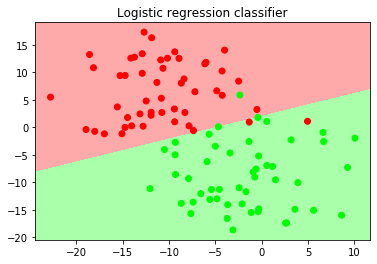


Total Number of Iteration :  8
--- 7.484586000442505 seconds ---


In [45]:
## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (x[:, 0].max() - x[:, 0].min())*0.05 # add 5% white space to border
y_delta = (x[:, 1].max() - x[:, 1].min())*0.05
x_min, x_max = x[:, 0].min() - x_delta, x[:, 0].max() + x_delta
y_min, y_max = x[:, 1].min() - y_delta, x[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr_predict(theta,np.c_[xx.ravel(), yy.ravel()])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)

## Show the plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression classifier")
plt.show()

print("\nTotal Number of Iteration : ",iter)
print("--- %s seconds ---" % (time.time() - start_time))